# PDAP2019.2 / Lecture 12: Image analyis, maps

2020-01-21

## References

- http://scipy-lectures.org/advanced/image_processing/
- https://scitools.org.uk/cartopy/docs/latest/

## Transcript

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

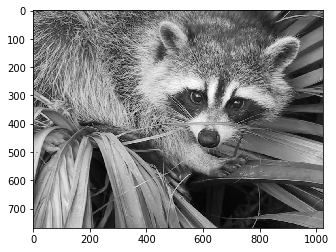

In [2]:
face = scipy.misc.face(gray=True)

plt.imshow(face, cmap=plt.cm.gray);

In [3]:
face.shape

(768, 1024)

In [4]:
face.dtype

dtype('uint8')

In [5]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

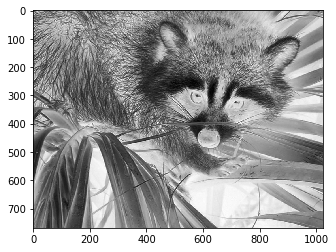

In [6]:
plt.imshow(255 - face, cmap='gray')

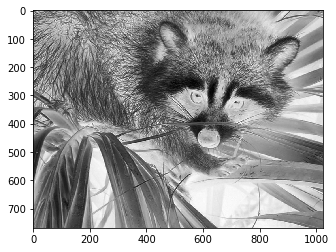

In [7]:
plt.imshow(face, cmap='gray_r');

In [8]:
myface = face.copy()

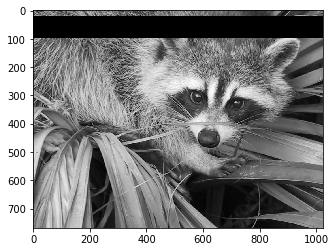

In [9]:
myface[20:100] = 0
plt.imshow(myface, cmap='gray');

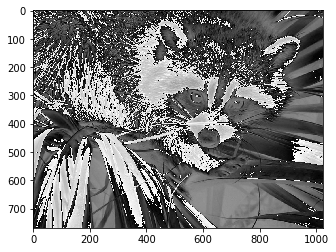

In [10]:
plt.imshow(150 - face, cmap='gray');

In [11]:
150 - face

array([[36, 20,  5, ..., 31, 21, 13],
       [67, 46, 27, ..., 32, 16,  4],
       [82, 62, 41, ..., 31, 16,  5],
       ...,
       [52, 47, 34, ...,  6,  7,  7],
       [56, 46, 30, ...,  7,  8,  8],
       [56, 44, 31, ...,  8,  9, 10]], dtype=uint8)

In [12]:
(150 - face).min()

0

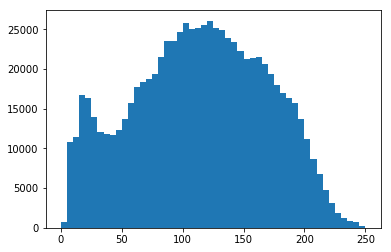

In [13]:
plt.hist(face.ravel(), bins=50);

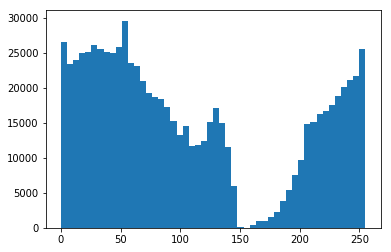

In [14]:
plt.hist((150 - face.ravel()), bins=50);

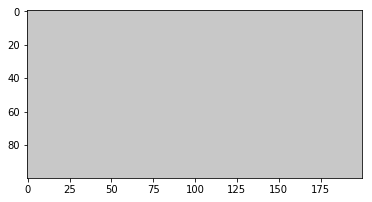

In [17]:
whiteimg = 200 * np.ones((100, 200), dtype='uint8')
plt.imshow(whiteimg, cmap='gray', vmin=0, vmax=255);

In [18]:
scipy.misc.imsave('myface.png', myface)

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


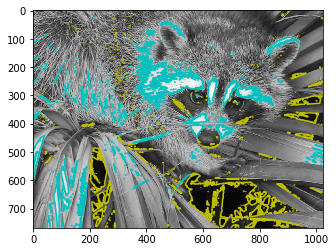

In [19]:
plt.imshow(face, cmap='gray')
plt.contour(face, [20.5, 200.5], colors=['y', 'c'])

# Plotting maps

In [20]:
import cartopy.crs as ccrs

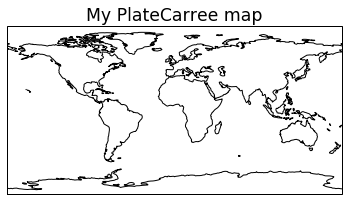

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('My PlateCarree map', fontsize='xx-large');

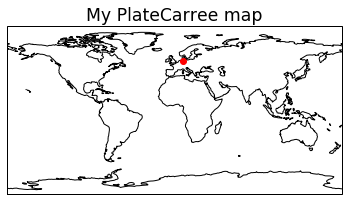

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot([8.8], [53.1], 'ro', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90])
ax.set_title('My PlateCarree map', fontsize='xx-large');

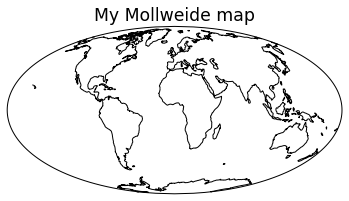

In [23]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.set_title('My Mollweide map', fontsize='xx-large');

In [24]:
import xarray as xr

In [25]:
da = xr.open_dataset('/data/pdap/xarray/gistemp250_GHCNv4.nc').tempanomaly

In [26]:
da

<xarray.DataArray 'tempanomaly' (time: 1673, lat: 90, lon: 180)>
[27102600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2019-05-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

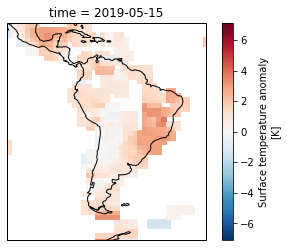

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree())
da[-1].plot.pcolormesh(ax=ax)
ax.coastlines()
ax.set_extent([-110, -25, -60, 20]);

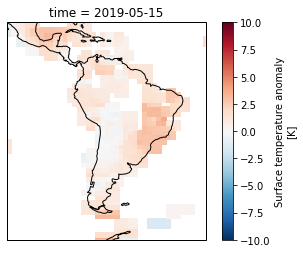

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree())
da[-1].plot.pcolormesh(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r')
ax.coastlines()
ax.set_extent([-110, -25, -60, 20]);

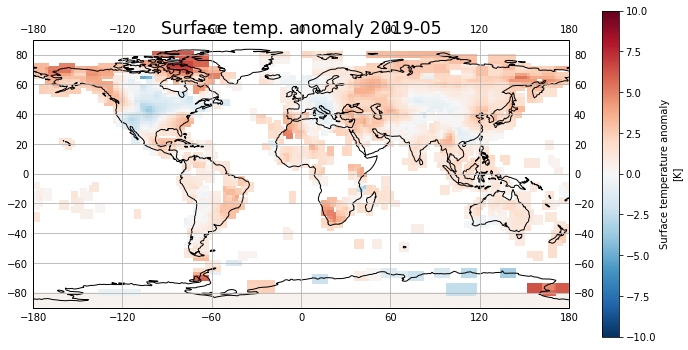

In [37]:
fig, ax = plt.subplots(figsize=(12, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()})
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax = plt.subplot(projection=ccrs.PlateCarree())
da[-1].plot.pcolormesh(ax=ax, vmin=-10, vmax=10, cmap='RdBu_r')
ax.set_title('Surface temp. anomaly 2019-05', size='xx-large')
ax.coastlines()
ax.gridlines(draw_labels=True);

In [38]:
NYx, NYy = -70, 40.7
HBx, HBy = 8.8, 53.1

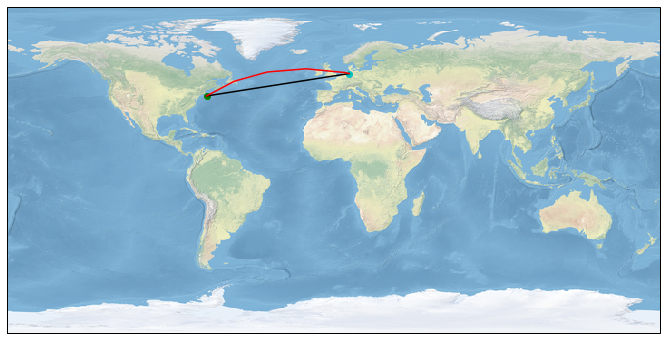

In [50]:
fig, ax = plt.subplots(figsize=(12, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()
ax.scatter(NYx, NYy, c='g', transform=ccrs.PlateCarree())
ax.scatter(HBx, HBy, c='c', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'k-', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'r-', transform=ccrs.Geodetic());

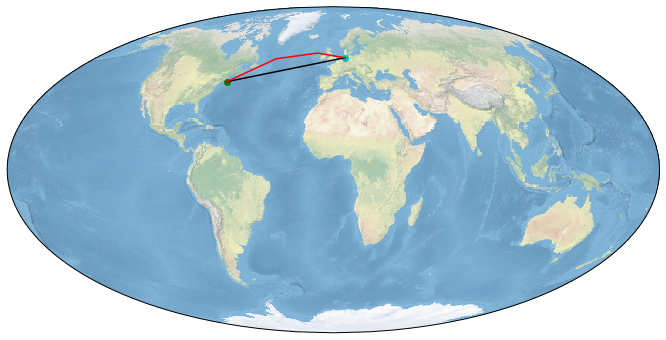

In [68]:
fig, ax = plt.subplots(figsize=(12, 6),
                       subplot_kw={'projection': ccrs.Mollweide()})
ax.stock_img()
ax.scatter(NYx, NYy, c='g', transform=ccrs.PlateCarree())
ax.scatter(HBx, HBy, c='c', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'k-', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'r-', transform=ccrs.Geodetic());

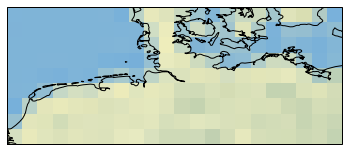

In [58]:
fig, ax = plt.subplots(figsize=(6, 4),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()
ax.set_extent([4., 15., 51.5, 56])
ax.coastlines(resolution='10m')

In [59]:
import cartopy.feature as cfeature

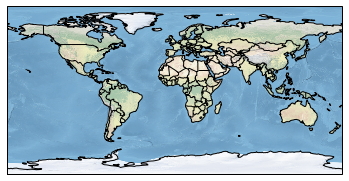

In [62]:
fig, ax = plt.subplots(figsize=(6, 4),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.coastlines()

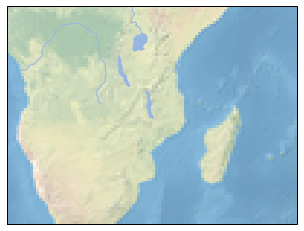

In [67]:
fig, ax = plt.subplots(figsize=(6, 4),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()
ax.set_extent([10., 60., -30., 5])
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

Distance calculation: see Haversine formula